# **Cyfrowe Przetwarzanie Sygnałów**

**Laboratorium nr 7 - Filtry cyfrowe II - FIR**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat

rozwiązania: Filip Korus

---

## **1. Projektowanie filtrów FIR metodą okien (2 pkt)**

Metodą okien zaprojektuj **pasmowoprzepustowy** (BP), nierekursywny filtr cyfrowy o następujących parametrach: częstotliwość próbkowania $f_{pr} =$ 1200 Hz, pasmo przepustowe o szerokości $d_f =$ 200 Hz, częstotliwość środkowa pasma przepustowego $f_c =$ 300 Hz. Zastosuj okna typu: **Prostokątne**, **Hanninga**, **Hamminga**, **Blackmana**, oraz **Blackmana-Harrisa**. Porównaj charakterystyki amplitudowo-częstotliwościowe i fazowo-częstotliwościowe wszystkich filtrów. Wyznacz ich poziom tłumienia w paśmie zaporowym (w decybelach). Przyjmij stała długość filtru N=128 próbek albo 129 próbek. Jakie są konsekwencje tej różnicy?

Następnie, zaprojektuj taki sygnał $x$, na którym wykażesz właściwości powyższych filtrów (np. suma dwóch lub trzech częstotliwości). Narysuj widmo gęstości mocy sygnału $x$ przed oraz po filtracji.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, firwin, lfilter, windows, boxcar, hann, hamming, blackman, blackmanharris

np.random.seed(0)

N = 129        # number of samples
fs = 1200      # sampling frequency

fp = 200       # 200Hz wide band
fk = 400       # middle of band - 300Hz


## **2. Filtry dla radia FM (1+0.25 pkt)**

Widmo gęstości widmowej mocy hybrydowego sygnału analogowego radia FM (po konwersji do niskich częstotliwości i demodulacji FM) wygląda jak na poniższym rysunku. Zaprojektuj dwa filtry FIR przepuszczające: tylko składową mono sygnału (L+R) oraz tylko  pilota 19 kHz.

Zadbaj o to, aby pierwszy filtr nie miał zafalowań w paśmie przepustowym, ponieważ to zmienia barwę dźwięku (audiofile bardzo tego nie lubią ;-)) oraz żeby częstotliwości od 19 kHz (włącznie) były tłumione ze skutecznością co najmniej 40 dB.

Drugi filtr ma pozostawić wyłącznie sygnał pilota o częstotliwości 19 kHz. Użycie filtru IIR z pojedynczym biegunem ,,nastrojonym” na 19 kHz może być niewystarczające. Dlatego zastosuj filtr FIR BP: dobierz szerokość pasma tak, aby pilot pozostał w przefiltrowanym sygnale lecz nie był zakłócony (zaszumiony) sąsiadującymi sygnałami o zbliżonych częstotliwościach. Zadbaj korekcję opóźnienia wprowadzanego przez filtr.

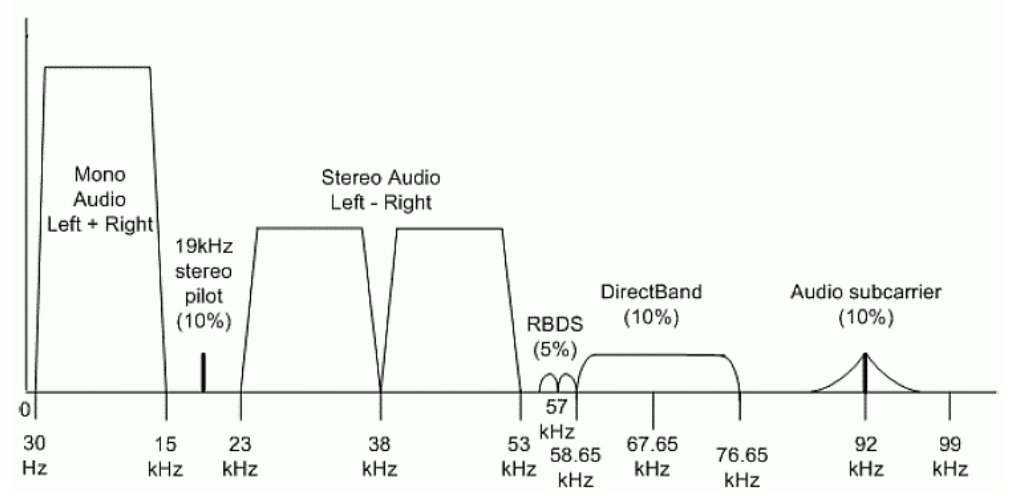
źródło: [http://en.wikiaudio.org/FM_broadcasting](http://en.wikiaudio.org/FM_broadcasting)



(**Opcjonalnie** +0.25 pkt) Zmodyfikuj program z laboratorium 06 podmieniając filtr IIR w decymatorze (punkt 4 ćwiczenia 2) na zaprojektowany, dolnoprzepustowy filtr FIR. Odsłuchaj sygnał.

Wykonaj filtrację sygnału drugim filtrem w celu uzyskania pilota stereo. Sprawdź na wykresie czasowo-częstotliwościowym czy pilot jest widoczny oraz czy jego położenie w dziedzinie częstotliwości się zmienia.

In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, firwin, butter

N = 1e5
fs = 2e5

In [ ]:
fs = 3.2e6  # sampling frequency
N = 32e6  # number of samples (IQ)
fc = 0.39e6  # central frequency of MF station

bwSERV = 80e3  # bandwidth of an FM service (bandwidth ~= sampling frequency!)
bwAUDIO = 16e3  # bandwidth of an FM audio (bandwidth == 1/2 * sampling frequency!)

!pip install gdown
import gdown
gdown.download('https://drive.google.com/uc?id=10RwlapFy9ZxDiiYnedIK5VX7AS6EMqzT', 'samples_100MHz_fs3200kHz.raw', quiet=False)

## **3. Radio FM Stereo (2+0.5 pkt)**

Analogowe radio FM transmitowało pierwotnie sygnał monofoniczny. W celu zachowania kompatybilności ,,w dół'', przy tworzeniu standardów radia stereofonicznego zastosowano schemat jak na rysunku z zadania 2. Sygnał monofoniczny to suma sygnału L i R (L+R), natomiast w innym paśmie nadawana jest różnica L i R (L-R).

W ten sposób stare, monofoniczne odbiorniki mogły nadal poprawnie dekodować sygnał stereofoniczny odzyskując z niego tylko część ,,mono'', natomiast nowsze odbiorniki, potrafiły z sygnału uzyskać oba kanały.

Wykonaj następujące kroki aby odzyskać sygnał stereofoniczny:

1. Filtrem BP o częstotliwości środkowej 19 kHz, zaprojektowanym w zadaniu 2, odzyskaj sygnał pilota z hybrydowego sygnału radia FM. Wyznacz jego widmo gęstości mocy w zakresie 18-20 kHz z dokładnością 1 Hz, odczytaj rzeczywistą częstotliwość sygnału pilota $f_{pl}$.

2. Zaprojektuj filtr FIR o charakterystyce BP do odfiltrowania sygnału stereo (L-R). Wykorzystaj podwojoną wartość $f_{pl}$ (patrz punkt 1) do ustalenia środka pasma przepustowego. Zaprojektowany filtr powinien posiadać płaską charakterystykę pasma przepustowego, oraz tłumienie pasma zaporowego w częstotliwościach $f_{pl}$  i $3f_{pl}$ , co najmniej 60 dB (tak aby pilot oraz sygnał tekstowy RDS nie zakłócały sygnału L-R).

3. Odfiltruj sygnał za pomocą filtru z pkt. 2. Następnie przesuń sygnał w częstotliwości z $2f_{pl}$ do 0 Hz metodą jego pomnożenia z funkcją cos() o częstotliwości $2f_{pl}$.  Wyświetl widma sygnałów: przed filtracją, po filtracji, po przesunięciu w częstotliwości. Czy widzisz „ducha” na częstotliwości $4f_{pl}$. Dlaczego się on pojawił?

  Aby „przesunąć” sygnał x z $2f_{pl}$ kHz do 0 kHz należy wykonać operację: $y=xe^{j2\pi2f_{pl}t}$ w praktyce, zakładający sygnały rzeczywiste, będzie to odpowiadało instrukcji: `y = x * c` gdzie `c` to kosinusoida o częstotliwości $2f_{pl}$. Dla rzeczywistego sygnału radiowego, sygnał c powinien być podwojonym pilotem 19 kHz, obecnym w sygnale hybrydowym, odtworzonym pętlą fazową z dokładnością do fazy. W naszym, uproszczonym przypadku, dla sygnału syntetycznego (plik `stereo_samples_fs1000kHz_LR_IQ.mat`) wystarczy jeżeli będzie to wygenerowana kosinusoida o częstotliwości $2f_{pl} =$ 38 kHz.

4. Zmniejsz częstotliwość próbkowania sygnału do częstotliwości 30 kHz. Nie zapomnij o filtrze antyaliasingowym, usuwającym „kopię” sygnału L-R na częstotliwości $4f_{pl}$! Dodatkowo przetestuj ostateczny program bez tego filtra.

5. Odtwarzanie sygnału stereo polega na wykonaniu operacji: `yl = 0.5 * (ym + ys)` oraz `yr = 0.5 * (ym - ys)` gdzie: yl i yr to wyjściowy sygnał audio, odpowiednio, kanału lewego i prawego, natomiast ym i ys to, odpowiednio, składowa mono (L+R) i stereo (L-R) hybrydowego sygnału radiowego. W związku z tym, że sygnały są odejmowane w dziedzinie czasu, to muszą być dobrze zsynchronizowane. Dlatego przed rekonstrukcją sygnałów yl i yr oblicz opóźnienie sygnału **L-R**, wprowadzane przez separujący filtr BP z punktu 2 i filtr antyaliasingowy z punktu 4, oraz opóźnienie sygnału **L+R**, wprowadzany przez filtr FIR LP, zaprojektowany w zadaniu 2. Skompensuj przesunięcie sygnałów L+R i L-R względem siebie. Jeśli tego nie zrobisz, nastąpi przenikanie kanału L do R i odwrotnie. Sprawdź czy takie przenikanie występuje.

Wykonaj dekodowanie sygnału stereo z zarejestrowanego sygnału rzeczywistego, znajdującego się w pliku `samples_100MHz_fs3200kHz.raw`. Następnie wykonaj to samo na sygnale `stereo_samples_fs1000kHz_LR_IQ.mat`. Zawiera on jedną ,,syntetyczną'' stację radiową FM stereo. Nadaje ona sygnał najpierw na lewym kanale (sinusoida 1000 Hz), a potem następnie na prawym kanale (sinusoida 800 Hz). Zdekoduj sygnał i sprawdź czy poprawnie otrzymałeś lewy i prawy kanał. Sygnał został zapisany w postaci próbek I i Q dostępnych jako wektory w Matlabie. Sygnał jest próbkowany z częstotliwością 1 MHz, stacja została umieszczona na częstotliwości 250 kHz.

Uwaga: Dobierz tak częstotliwości repróbkowania sygnału (np. operacja decymacji przy przejściu z sygnału radiowego do hybrydowego sygnału FM, przed demodulacją), aby częstotliwość próbkowania przed decymacją była całkowitą wielokrotnością częstotliwości próbkowania po decymacji.

**Opcjonalnie** (+0.5 pkt) oblicz energię przesłuchu (w dB) pomiędzy kanałami w dwóch przypadkach: gdy przesunięcie wprowadzane przez filtry pomiędzy sygnałem L+R i L-R zostanie uwzględnione oraz zostanie zignorowane.



In [ ]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, firwin, firwin2, decimate, filtfilt, resample

# Parameters
fs = 3.2e6          # sampling frequency
N = 32e6            # number of samples
fc = 0.40e6         # central frequency of MF station
bwSERV = 80e3       # bandwidth of an FM service
bwAUDIO = 16e3      # bandwidth of an FM audio

!pip install gdown
import gdown
gdown.download('https://drive.google.com/uc?id=10RwlapFy9ZxDiiYnedIK5VX7AS6EMqzT', 'samples_100MHz_fs3200kHz.raw', quiet=False)